<a href="https://colab.research.google.com/github/tyukios/genai/blob/main/hw2_%E7%A5%9E%E7%B6%93%E7%B6%B2%E8%B7%AF001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###0.   設定深度學習層數:**設定5層**

這邊想測試一開始隱藏層參數不多，中間增加參數，到最後又減少參數會對神經網路產生什麼影響

[N1,N2,N3,N4,N5] = [10,60,20,30,10]

In [ ]:
N1 = 10
N2 = 60
N3 = 20
N4 = 30
N5 = 10

### 1. 讀入套件

In [ ]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 MB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.1/322.1 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 58.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.6 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.5.1+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
to

In [ ]:
%matplotlib inline

# 標準數據分析、畫圖套件
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# 神經網路方面
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

# 互動設計用
from ipywidgets import interact_manual

# 神速打造 web app 的 Gradio
import gradio as gr

### 2. 讀入 MNIST

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f'訓練資料總筆數為 {len(x_train)} 筆資料')
print(f'測試資料總筆數為 {len(x_test)} 筆資料')

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
訓練資料總筆數為 60000 筆資料
測試資料總筆數為 10000 筆資料


### 3. 輸入/出 格式整理（常模化）

In [ ]:
x_train = x_train.reshape(60000, 784)/255
x_test = x_test.reshape(10000, 784)/255

In [ ]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

### 4. 打開函數學習機

In [ ]:
model = Sequential()

### 5.1   建置神經網路

N1,N2,N3,N4,N5 均使用elu

In [ ]:
model.add(Dense(N1, input_dim=784, activation='elu'))
model.add(Dense(N2, activation='elu'))
model.add(Dense(N3, activation='elu'))
model.add(Dense(N4, activation='elu'))
model.add(Dense(N5, activation='elu'))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### 5.2 組裝

In [ ]:
model.compile(loss='mse', optimizer=SGD(learning_rate=0.087), metrics=['accuracy'])

### 6. 檢視神經網路

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │           7,850 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 60)                  │             660 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 20)                  │           1,220 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 30)                  │             630 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             310 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             110 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,780 (42.11 KB)

 Trainable params: 10,780 (42.11 KB)

 Non-trainable params: 0 (0.00 B)

### 7. 訓練神經網路
設置batch_size=77, epochs=13

In [ ]:
model.fit(x_train, y_train, batch_size=77, epochs=13)

Epoch 1/13
780/780 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.2177 - loss: 0.0874
Epoch 2/13
780/780 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5037 - loss: 0.0657
Epoch 3/13
780/780 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7127 - loss: 0.0415
Epoch 4/13
780/780 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8129 - loss: 0.0287
Epoch 5/13
780/780 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8537 - loss: 0.0227
Epoch 6/13
780/780 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8716 - loss: 0.0196
Epoch 7/13
780/780 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8840 - loss: 0.0179
Epoch 8/13
780/780 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8897 - loss: 0.0169
Epoch 9/13
780/780 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8937 - loss: 0.0163
Epoch 10/13
780/780 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8987 - loss: 0.0155
Epoch 11/13
780/780 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9031 - loss: 0.0148
Epoch 12/13
780/780 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step

### 8. 測試資料的正確率

In [ ]:
loss, acc = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8996 - loss: 0.0151


In [ ]:
print(f"測試資料正確率 {acc*100:.2f}%")

測試資料正確率 91.04%


In [ ]:
predict = np.argmax(model.predict(x_test), axis=-1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [ ]:
predict

array([7, 2, 1, ..., 4, 5, 6])

看看測試結果

In [ ]:
def test(測試編號):
    plt.imshow(x_test[測試編號].reshape(28,28), cmap='Greys')
    print('神經網路判斷為:', predict[測試編號])

In [ ]:
interact_manual(test, 測試編號=(0, 9999));

interactive(children=(IntSlider(value=4999, description='測試編號', max=9999), Button(description='Run Interact', …

看看正確率

In [ ]:
score = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8996 - loss: 0.0151


In [ ]:
print('loss:', score[0])
print('正確率', score[1])

loss: 0.013479931280016899
正確率 0.9103999733924866


### 7. 用 Gradio 來展示

In [ ]:
def resize_image(inp):
    # 圖在 inp["layers"][0]
    image = np.array(inp["layers"][0], dtype=np.float32)
    image = image.astype(np.uint8)

    # 轉成 PIL 格式
    image_pil = Image.fromarray(image)

    # Alpha 通道設為白色, 再把圖從 RGBA 轉成 RGB
    background = Image.new("RGB", image_pil.size, (255, 255, 255))
    background.paste(image_pil, mask=image_pil.split()[3]) # 把圖片粘貼到白色背景上，使用透明通道作為遮罩
    image_pil = background

    # 轉換為灰階圖像
    image_gray = image_pil.convert("L")

    # 將灰階圖像縮放到 28x28, 轉回 numpy array
    img_array = np.array(image_gray.resize((28, 28), resample=Image.LANCZOS))

    # 配合 MNIST 數據集
    img_array = 255 - img_array

    # 拉平並縮放
    img_array = img_array.reshape(1, 784) / 255.0

    return img_array

In [ ]:
def recognize_digit(inp):
    img_array = resize_image(inp)
    prediction = model.predict(img_array).flatten()
    labels = list('0123456789')
    return {labels[i]: float(prediction[i]) for i in range(10)}

In [ ]:
iface = gr.Interface(
    fn=recognize_digit,
    inputs=gr.Sketchpad(),
    outputs=gr.Label(num_top_classes=3),
    title="MNIST 手寫辨識",
    description="請在畫板上繪製數字"
)

iface.launch(share=True, debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://dd99642f19685d3cb8.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


##測試結果說明

使用ChatGPT的紀錄連結：

https://chatgpt.com/share/67cd965f-1430-8001-84bf-804ac6fe8c8f

###第一次測試配置（更改參數）

[N1,N2,N3,N4,N5] = [10,60,20,30,10]   ***（只有改這裡）***

5層均使用relu

batch_size=100, epochs=10

loss function用mse optimizer=SGD(learning_rate=0.087)

**但測試資料正確率只有 72.42%**

原本以為在其他配置不改的情況下增加隱藏層會讓正確性提高，實測結果卻不然。
在問了ChatGPT還有哪些激活函數後，決定分別嘗試使用
1.   改進版 ReLU，允許 x<0 時有小的梯度（如 0.01x）的
 **leaky_relu**
2.   指數線性單元 ELU，類似 ReLU 但有更好的梯度特性的  **elu**

想看看這兩個跟relu有關的函數有沒有助於提升正確率。


以下使用colab的ai分別畫出relu 和 leaky_relu 和 elu 的圖形，輔助觀察這三者有什麼不同：

leaky_relu在原點的左方和relu不同，當x<0的時候，y並不一定是0

elu相較於relu的圖形有更多弧度（有點像是對數圖形），特徵是當x=0的時候，y並不是0

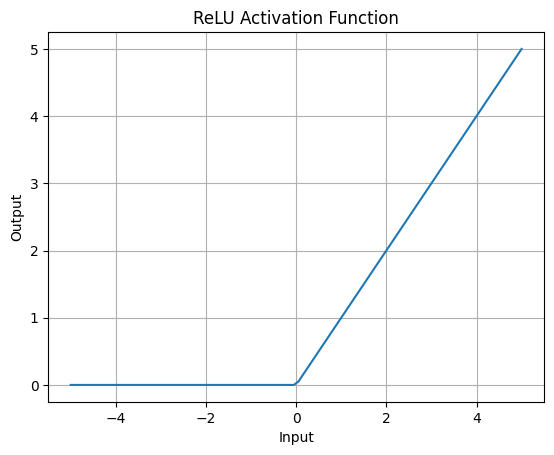

In [ ]:
# prompt: 畫出ReLu

import numpy as np
import matplotlib.pyplot as plt

def relu(x):
  return np.maximum(0, x)

x = np.linspace(-5, 5, 100)
y = relu(x)

plt.plot(x, y)
plt.title('ReLU Activation Function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(True)
plt.show()


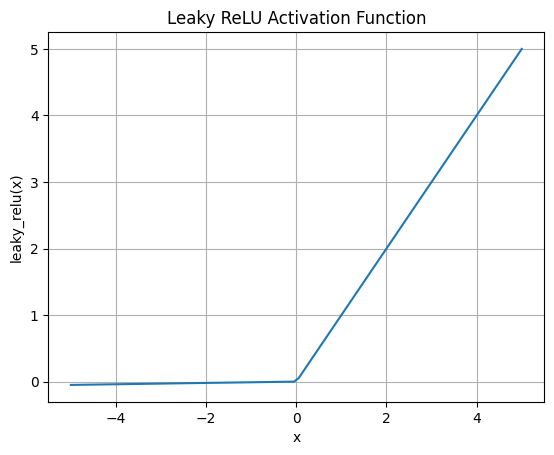

In [ ]:
# prompt: 畫出leaky_relu

import numpy as np
import matplotlib.pyplot as plt

def leaky_relu(x, alpha=0.01):
  return np.maximum(alpha * x, x)

x = np.linspace(-5, 5, 100)
y = leaky_relu(x)

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('leaky_relu(x)')
plt.title('Leaky ReLU Activation Function')
plt.grid(True)
plt.show()


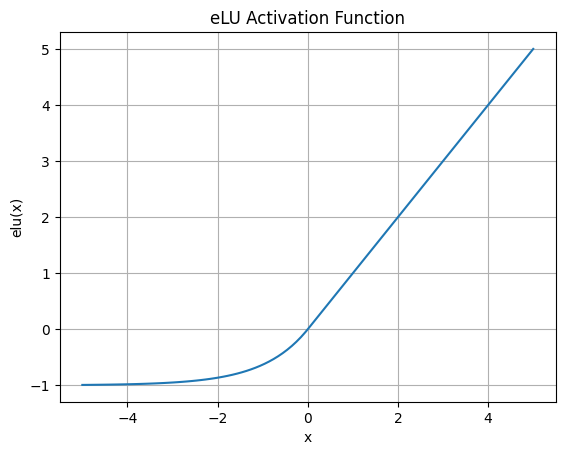

In [ ]:
# prompt: 畫出eLu

def elu(x, alpha=1.0):
  return np.where(x > 0, x, alpha * (np.exp(x) - 1))

x = np.linspace(-5, 5, 100)
y = elu(x)

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('elu(x)')
plt.title('eLU Activation Function')
plt.grid(True)
plt.show()


###第二次測試配置（更改激活函數）

5層均改成使用leaky_relu

**測試資料正確率提升至 84.00%**

5層均改成使用elu

**測試資料正確率提升至 87.92%**

由於使用elu得到的正確率很靠近90%，因此決定繼續使用elu。
接著，決定更改batch_size的數值，看看能不能提升正確率。

###第三次測試配置（更改batch_size）

batch_size=90
測試資料正確率提升至 89.26%

batch_size=80
測試資料正確率提升至 89.94%

batch_size=70
測試資料正確率下降至 89.80%

batch_size=75
測試資料正確率提升至 90.22%

batch_size=77
**測試資料正確率提升至 90.53%**

batch_size=78
測試資料正確率下降至 89.85%

經過測試，batch_size=77時得到的正確率已達90.53%，因此決定繼續使用。
接著，決定增加epochs的數值，看看能不能繼續提升正確率。


###第四次測試配置（更改epochs）

這次測試中，正確率都能穩定維持在90%以上

epochs=15
測試資料正確率下降至 90.42%

epochs=12
測試資料正確率提升至 90.73%

epochs=13
**測試資料正確率提升至 91.37%**

epochs=14
測試資料正確率下降至 90.86%

經過測試，epochs=13時得到的正確率達91.37%